In [28]:
import numpy
import pandas
import utils
from matplotlib import pyplot

import PO_classifier
%matplotlib inline


In [38]:
def show_info(sns_id):
    data = po.extract(sns_id)
    prediction = po.predict(sns_id)
    print '\nRAW PROFILE INFO\n'
    print 'Name raw:', data['name_raw']
    print 'Description raw:', data['description_raw']
    print 'Image: ', len(data['image_dat'])
    pyplot.imshow(data['image_dat'])
    print '\nEXTRACTED INFO\n'
    print 'Name: ', data['name']
    print 'Noun: ', data['noun']
    print 'Pronoun:', data['pronoun']
    print 'image entropy', data['image_entropy']
    print '\nPREDICTION\n'
    print 'nouns probability: ', prediction['description_prob_list'][0]
    print 'pronouns probability: ', prediction['description_prob_list'][1]
    print 'name probability: ', prediction['name_prob']
    print 'Organization probability: ', prediction['confidence']
    print 'Prediction: ', prediction['class']

In [30]:
model_path = '/mnt/filter-disk1/phananh.nguyen/models/'
dataset_path = '/mnt/filter-disk1/phananh.nguyen/data/'

In [31]:
po = PO_classifier.POClassifier(model_path=model_path, 
                 database='da0', 
                 user='dbo', 
                 password='sentifi', 
                 host='10.0.0.220', 
                 port=5432)

In [32]:
error_snsid1 = [326926748,
327850075,
330587757,
327988268,
331403309,
330440876
]
error_snsid2 = [321204660,
324190055,
331279743,
322189629,
323523249
]
working_snsid = [322402846,
322494790,
322509721,
322512498,
328726176,
330029978,
322537507
]


RAW PROFILE INFO

Name raw: Ecofirst Services
Description raw: Ecofirst Services Pvt. Ltd.: Drive the creation of sustainable communities by developing and delivering India specific solutions.
Image:  855

EXTRACTED INFO

Name:  Ecofirst Services
Noun:  Ecofirst Services Pvt Ltd Drive creation communities India solutions
Pronoun: 
image entropy [ 2.44886303]

PREDICTION

nouns probability:  0.99240623178
pronouns probability:  0.410129535763
name probability:  0.957696266229
Organization probability:  0.996107365665
Prediction:  O


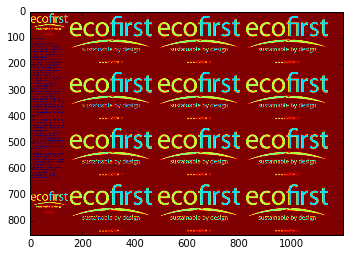

In [41]:

sns_id = '322509721'
show_info(sns_id)


RAW PROFILE INFO

Name raw: Dave McClure
Description raw: Founder & Troublemaker @500Startups.
Image:  960

EXTRACTED INFO

Name:  Dave Mc Clure
Noun:  Founder Troublemaker
Pronoun: 
image entropy [ 7.36354303]

PREDICTION

nouns probability 0.0105263225669
pronouns probability 0.410129535763
name probability 0.00952021779185
Organization probability 0.0037227323354
Prediction P


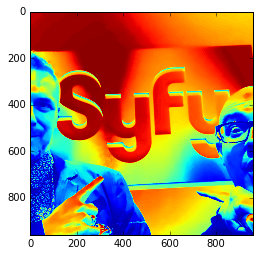

In [19]:
sns_id = '1081'
show_info(sns_id)


RAW PROFILE INFO

Name raw: Folk On
Description raw: All aboard the Folkswagen as you follow Derek Tinkleberry, Donald Cornfoot and Edmund Sidebottam, from the village of Little Dribblepatch. It's time to Folk On!
Image:  200

EXTRACTED INFO

Name:  Folk On
Noun:  Folkswagen Derek Tinkleberry Donald Cornfoot Edmund Sidebottam village Little Dribblepatch time Folk
Pronoun: you It
image entropy [ 3.12520933]

PREDICTION

nouns probability 0.647803078075
pronouns probability 0.472337607367
name probability 0.66175307712
Organization probability 0.910907983662
Prediction O


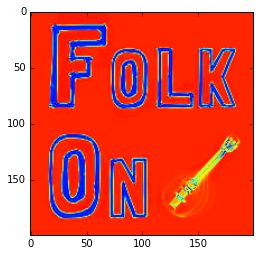

In [22]:
sns_id = '330587757'
show_info(sns_id)

In [35]:
train_df_raw = pandas.read_json(dataset_path + "df_train25k_name_desc_entropy_v14.json")
train_df = train_df_raw[train_df_raw['name'].str.len() > 0]
train_df_P = train_df[train_df['po_tag']==0]
train_df_O = train_df[train_df['po_tag']==1]
#print train_df_raw.head()


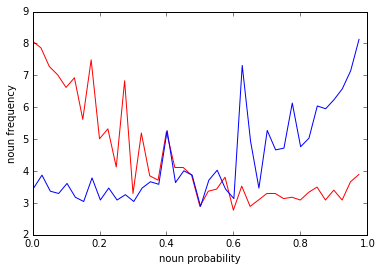

In [37]:
histP, binP = numpy.histogram(train_df_P['refined_name_prob'].tolist(), 40)
histO, binO = numpy.histogram(train_df_O['refined_name_prob'].tolist(), 40)

pyplot.plot(binP[:-1], numpy.log(histP), 'r')
pyplot.plot(binO[:-1], numpy.log(histO), 'b')
pyplot.ylabel('name frequency')
pyplot.xlabel('noun probability')

# Nouns in description

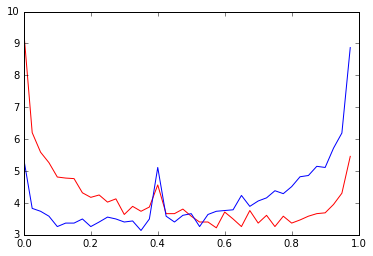

In [11]:
histP, binP = numpy.histogram(train_df_P['description_nn_prob'].tolist(), 40)
histO, binO = numpy.histogram(train_df_O['description_nn_prob'].tolist(), 40)

pyplot.plot(binP[:-1], numpy.log(histP), 'r')
pyplot.plot(binO[:-1], numpy.log(histO), 'b')
pyplot.xlabel('noun probability')
pyplot.xlabel('noun frequency')

# Pronoun in description

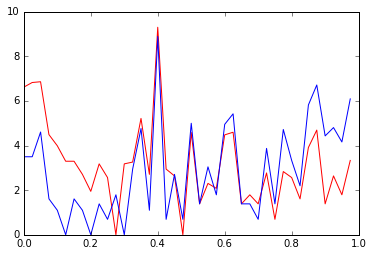

In [12]:
histP, binP = numpy.histogram(train_df_P['description_pr_prob'].tolist(), 40)
histO, binO = numpy.histogram(train_df_O['description_pr_prob'].tolist(), 40)

pyplot.plot(binP[:-1], numpy.log(histP), 'r')
pyplot.plot(binO[:-1], numpy.log(histO), 'b')

# Image entropy

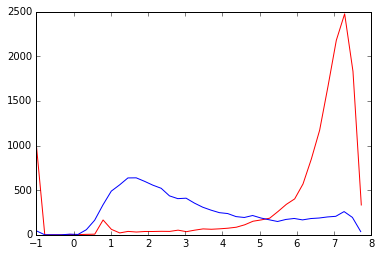

In [16]:
#train_df = train_df_raw[train_df_raw['description'].str.len() > 0]

histP, binP = numpy.histogram(train_df_P['entropy_merged'].tolist(), 40)
histO, binO = numpy.histogram(train_df_O['entropy_merged'].tolist(), 40)

pyplot.plot(binP[:-1], (histP), 'r')
pyplot.plot(binO[:-1], (histO), 'b')